In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import json

Runs: 50


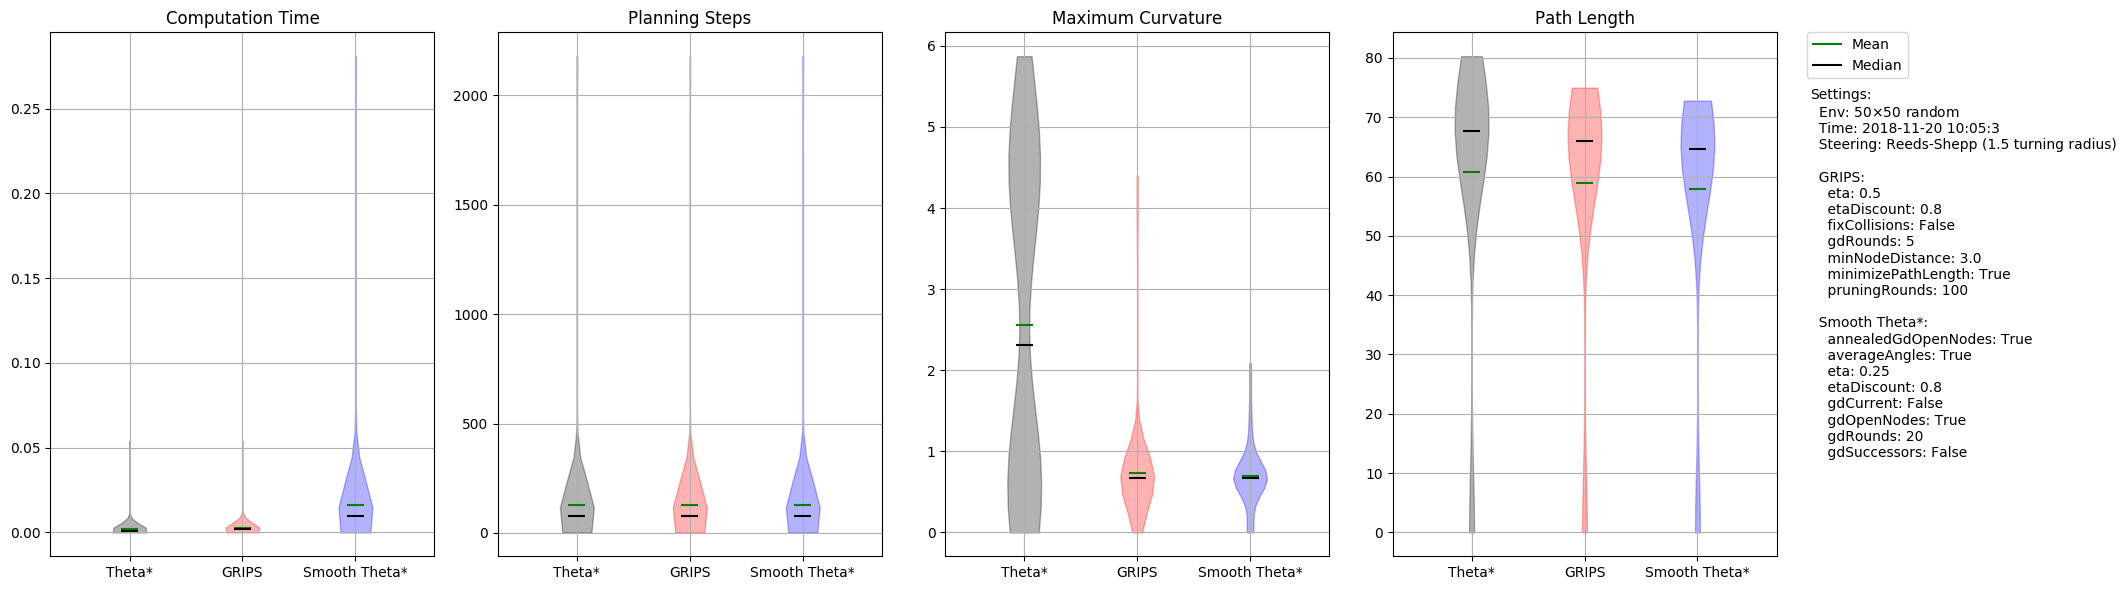

In [3]:
sns.reset_orig()

data = json.load(open("cmake-build-release/log/Reeds-Shepp 50x50 random 1542671305 2018-11-20 10:05:3.json", "r"))

runs = len(data["runs"])
print("Runs:", runs)

def plot_violins(values):
    plt.grid()
    violins = plt.violinplot(values, [0, 1, 2], points=20, widths=0.3,
                          showmeans=True, showextrema=False, showmedians=True)
    violins["bodies"][0].set_facecolor("black")
    violins["bodies"][1].set_facecolor("red")
    violins["bodies"][2].set_facecolor("blue")
    violins["bodies"][0].set_edgecolor("black")
    violins["bodies"][1].set_edgecolor("red")
    violins["bodies"][2].set_edgecolor("blue")
    for partname in ('cmeans','cmedians'):
        violins[partname].set_edgecolor("black")
    violins['cmeans'].set_edgecolor('green')
    plt.gca().set_xlim([-.7, 2.7])
    plt.gca().set_xticks([0, 1, 2])
    plt.gca().set_xticklabels(["Theta*", "GRIPS", "Smooth Theta*"])
    

plt.figure(figsize=(18, 6))
plt.subplot(141)
plt.title("Computation Time")
times = [[e["thetaStar"]["time"] for e in data["runs"]], [e["grips"]["time"] for e in data["runs"]], [e["smoothThetaStar"]["time"] for e in data["runs"]]]
plot_violins(times)

plt.subplot(142)
plt.title("Planning Steps")
steps = [[e["thetaStar"]["steps"] for e in data["runs"]], [e["grips"]["steps"] for e in data["runs"]], [e["smoothThetaStar"]["steps"] for e in data["runs"]]]
plot_violins(steps)

plt.subplot(143)
plt.title("Maximum Curvature")
curvatures = [[e["thetaStar"]["curvature"] for e in data["runs"]], [e["grips"]["curvature"] for e in data["runs"]], [e["smoothThetaStar"]["curvature"] for e in data["runs"]]]
plot_violins(curvatures)

plt.subplot(144)
plt.title("Path Length")
pathLengths = [[e["thetaStar"]["pathLength"] for e in data["runs"]], [e["grips"]["pathLength"] for e in data["runs"]], [e["smoothThetaStar"]["pathLength"] for e in data["runs"]]]
plot_violins(pathLengths)

plt.gca().text(3, 10, "Settings:\n" \
               + ("  Env: %d$\\times$%d %s\n" % (data["environment"]["width"], data["environment"]["height"], data["environment"]["generator"])) \
               + ("  Time: %s\n" % (data["globals"]["time"])) \
               + ("  Steering: %s (%s turning radius)\n\n" % (data["settings"]["steering"], data["settings"]["carTurningRadius"])) \
               + ("  GRIPS:\n%s\n\n" % "\n".join(["    %s: %s" % (key, value) for key, value in data["settings"]["grips"].items()])) \
               + ("  Smooth Theta*:\n%s\n" % "\n".join(["    %s: %s" % (key, value) for key, value in data["settings"]["smoothStar"].items()])) \
)

plt.plot([np.nan], [np.nan], color="green", label="Mean")
plt.plot([np.nan], [np.nan], color="black", label="Median")
plt.legend(bbox_to_anchor=(1.08, 1), loc=2, borderaxespad=0.)

plt.tight_layout()
plt.savefig("gd_only_gd_annealed_average_angles.png", dpi=300)

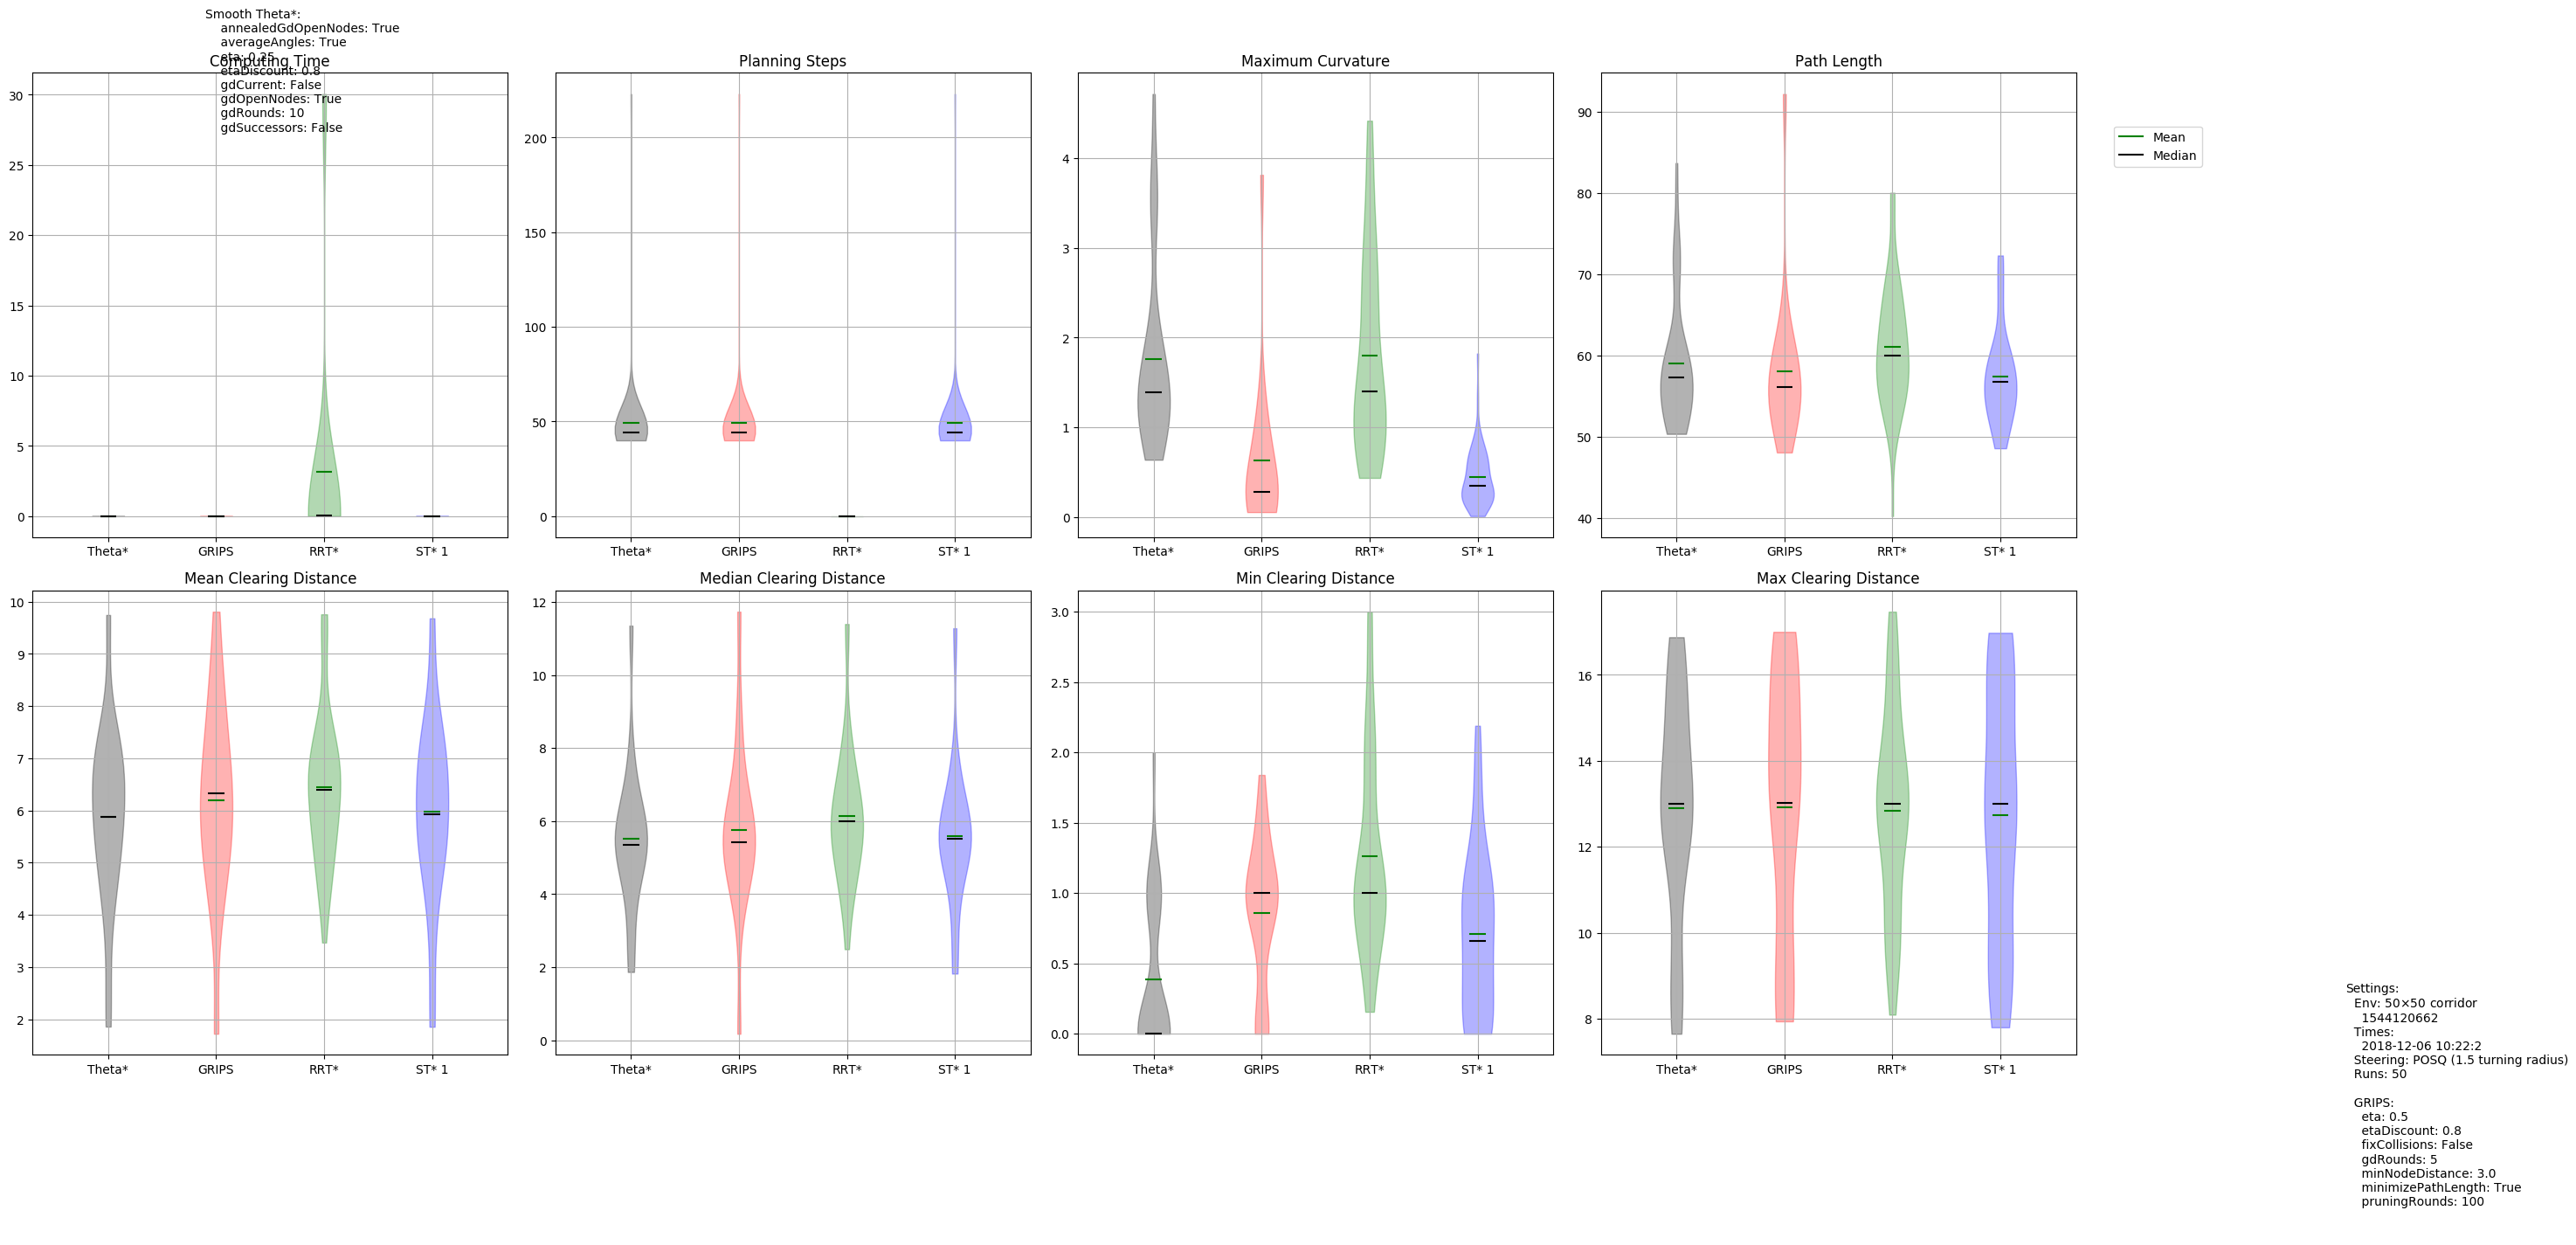

In [10]:
sns.reset_orig()

data = [
    json.load(open("/home/eric/catkin_ws/devel/lib/smooth_star/log/POSQ 50x50 corridor 1544120662 2018-12-06 10:22:2.json", "r")),
#     json.load(open("/home/eric/catkin_ws/devel/lib/smooth_star/log/Reeds-Shepp 50x50 random 1542671305 2018-12-06 10:14:4.json", "r")),
#     json.load(open("cmake-build-release/log/Reeds-Shepp 50x50 random 1542671305 2018-11-21 12:12:5.json", "r")),
#     json.load(open("cmake-build-release/log/Reeds-Shepp 50x50 random 1542671305 2018-11-21 12:15:4.json", "r")),
#     json.load(open("cmake-build-release/log/Reeds-Shepp 50x50 random 1542671305 2018-11-21 12:16:2.json", "r"))
]

axes = [
    ["time", "steps", "curvature", "pathLength"],
    ["meanClearingDistance", "medianClearingDistance", "minClearingDistance", "maxClearingDistance"]
]

axis_labels = [
    ["Computing Time", "Planning Steps", "Maximum Curvature", "Path Length"],
    ["Mean Clearing Distance", "Median Clearing Distance", "Min Clearing Distance", "Max Clearing Distance"]
]

axes_h = len(axes[0])
axes_v = len(axes)

colors = ["black", "red", "green", "blue", "lightblue", "cyan", "turquoise", "teal"]

def plot_violins(values):
    plt.grid()
    violins = plt.violinplot(values, list(range(len(values))), points=50, widths=0.3,
                          showmeans=True, showextrema=False, showmedians=True)
    for i in range(len(values)):
        violins["bodies"][i].set_facecolor(colors[i % len(colors)])
        violins["bodies"][i].set_edgecolor(colors[i % len(colors)])
    
    violins['cmedians'].set_edgecolor("black")
    violins['cmeans'].set_edgecolor('green')
    
    plt.gca().set_xlim([-.7, len(values) - .3])
    plt.gca().set_xticks(list(range(len(values))))
    if len(values) == 3:
        plt.gca().set_xticklabels(["Theta*", "GRIPS", "RRT*", "Smooth Theta*"])
    else:
        plt.gca().set_xticklabels(["Theta*", "GRIPS", "RRT*"] + ["ST* %d" % i for i in range(1, len(values) + 1)])
    

plt.figure(figsize=(axes_h * 6, axes_v * 6))
for y, axs in enumerate(axes):
    for x, name in enumerate(axs):
        plt.subplot("%i%i%i" % (axes_v, axes_h, y * axes_h + x + 1))
        plt.title(axis_labels[y][x])
        times = [[e["thetaStar"][name] for e in data[0]["runs"]], [e["grips"][name] for e in data[0]["runs"]], [e["rrtStar"][name] for e in data[0]["runs"]], [e["smoothThetaStar"][name] for e in data[0]["runs"]]]
        for d in data[1:]:
            times.append([e["thetaStar"][name] for e in d["runs"]])
        plot_violins(times)

plt.gca().text(2.2 + axes_h, 1.0 + axes_v, "Settings:\n" \
               + ("  Env: %d$\\times$%d %s\n" % (data[0]["environment"]["width"], data[0]["environment"]["height"], data[0]["environment"]["generator"])) \
               + ("\n".join("    %s" % d["environment"]["seed"] for d in data) + "\n")
               + ("  Times:\n%s\n" % ("\n".join("    %s" % d["globals"]["time"] for d in data))) \
               + ("  Steering: %s (%s turning radius)\n" % (data[0]["settings"]["steering"], data[0]["settings"]["carTurningRadius"])) \
               + ("  Runs: %d\n\n" % (len(data[0]["runs"]))) \
               + ("  GRIPS:\n%s\n\n" % "\n".join(["    %s: %s" % (key, value) for key, value in data[0]["settings"]["grips"].items()])))
if len(data) == 1:
    plt.text(0.1, 0.9,
             "Smooth Theta*:\n%s\n" % "\n".join(["    %s: %s" % (key, value) for key, value in data[0]["settings"]["smoothStar"].items()]),
             transform=plt.gcf().transFigure)
else:
    for i, d in enumerate(data):
        plt.text(0.14 + i * 0.18, 0.04, str(i+1), transform=plt.gcf().transFigure,
                 bbox={"boxstyle": "circle", "color": colors[2 + i], "alpha": 0.4})
        plt.text(0.155 + i * 0.18, -0.08,
                 "Smooth Theta* %d:\n%s\n" % (i+1, "\n".join(["    %s: %s" % (key, value) for key, value in data[i]["settings"]["smoothStar"].items()])),
                 transform=plt.gcf().transFigure)

plt.plot([np.nan], [np.nan], color="green", label="Mean")
plt.plot([np.nan], [np.nan], color="black", label="Median")
plt.legend(bbox_to_anchor=(1.08, axes_v), loc=2, borderaxespad=0.)

plt.tight_layout()
plt.savefig("gd_multiple_logs.png", dpi=300, bbox_inches='tight')

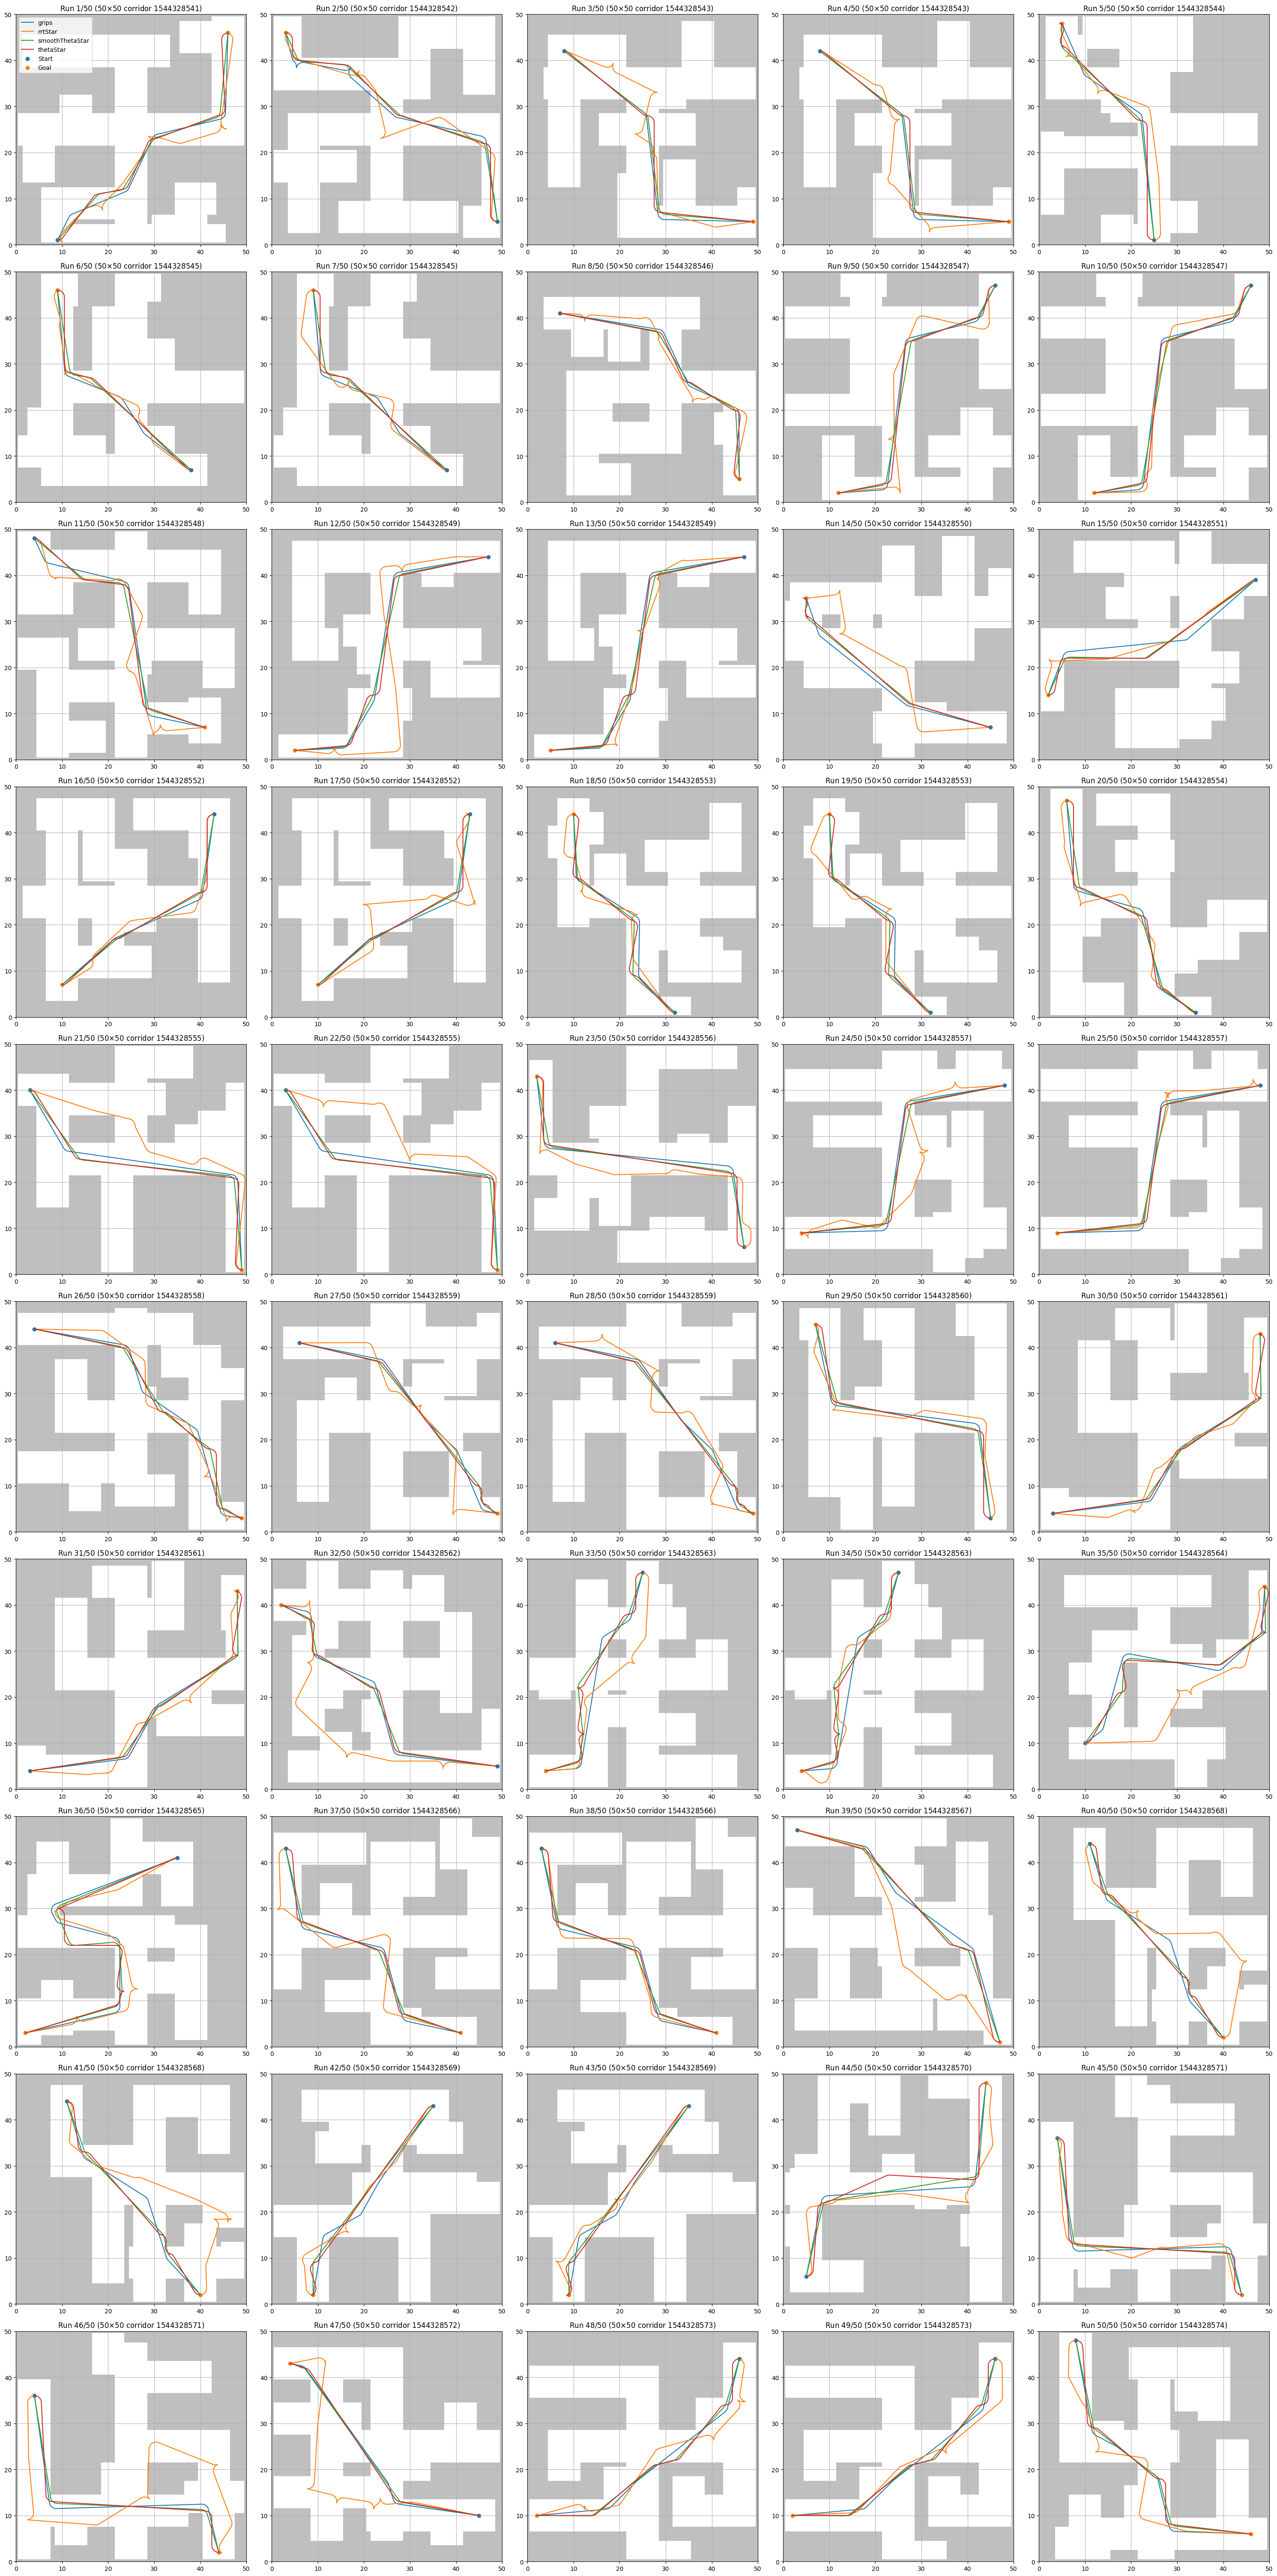

In [48]:
from bitarray import bitarray

data = [
    json.load(open("/home/eric/catkin_ws/devel/lib/smooth_star/log/Reeds-Shepp 50x50 corridor 1544328574 2018-12-08 20:06:5.json", "r")),
#     json.load(open("/home/eric/catkin_ws/devel/lib/smooth_star/log/Reeds-Shepp 50x50 random 1542671305 2018-12-06 10:14:4.json", "r")),
#     json.load(open("cmake-build-release/log/Reeds-Shepp 50x50 random 1542671305 2018-11-21 12:12:5.json", "r")),
#     json.load(open("cmake-build-release/log/Reeds-Shepp 50x50 random 1542671305 2018-11-21 12:15:4.json", "r")),
#     json.load(open("cmake-build-release/log/Reeds-Shepp 50x50 random 1542671305 2018-11-21 12:16:2.json", "r"))
]

MAX_PLOTS_PER_LINE = 5

axes = [
    ["time", "steps", "curvature", "pathLength"],
    ["meanClearingDistance", "medianClearingDistance", "minClearingDistance", "maxClearingDistance"]
]

axis_labels = [
    ["Computing Time", "Planning Steps", "Maximum Curvature", "Path Length"],
    ["Mean Clearing Distance", "Median Clearing Distance", "Min Clearing Distance", "Max Clearing Distance"]
]

axes_h = MAX_PLOTS_PER_LINE
axes_v = len(data[0]["runs"]) // MAX_PLOTS_PER_LINE + 1

colors = ["black", "red", "green", "blue", "lightblue", "cyan", "turquoise", "teal"]

def plot_run(i, run):
    plt.grid()
    
    w = run["environment"]["width"]
    h = run["environment"]["height"]
    plt.title("Run %i/%i (%i$\\times$%i %s %i)" % (i+1, len(data[0]["runs"]), w, h, run["environment"]["generator"], run["environment"]["seed"]))
    map_data = np.array(list(bitarray(run["environment"]["map"]))).reshape((w+1, h+1))
    map_data = 1. - np.flip(map_data, axis=0)
    plt.imshow(map_data, cmap='gray', vmin=-1, vmax=1, alpha=0.5)
    
    start = run["environment"]["start"]
    goal = run["environment"]["goal"]
    plt.scatter([start[0]], [h - start[1]], label="Start")
    plt.scatter([goal[0]], [h - goal[1]], label="Goal")
    
    for planner, plan in run["plans"].items():
        path = np.array(plan["path"])
        plt.plot(path[:, 0], h - path[:, 1], label=planner)
    
    plt.gca().set_xlim([0, w])
    plt.gca().set_ylim([0, h])
    
    if i == 0:
        plt.legend()
    

plt.figure(figsize=(axes_h * 6, axes_v * 6))
for i, run in enumerate(data[0]["runs"]):
    plt.subplot(axes_v, axes_h, i+1)
    plot_run(i, run)

plt.tight_layout()
plt.savefig("trajectories.png", dpi=300, bbox_inches='tight')